In [37]:
# Typical Everydayers...
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Unicode, Regex, json for text digestion
import unicodedata
import re
import json

import datetime
# Time formatting
from time import strftime
# Make deepcopy
import copy

# Modeling help...
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# nltk: natural language toolkit -> tokenization, stopwords
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as stemmer
# nltk.download('stopwords')
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()

# Import prepare
import draft_prepare as p

# Quieeet!!! Y'all can't stop me now...
import warnings
warnings.filterwarnings('ignore')

# set default style for charts
plt.rc('figure', figsize=(13, 7))
plt.style.use('fivethirtyeight')
# change jupyter notebook setting to show all rows
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('songs_0526.csv')
df.shape

(23762, 5)

### Preparing the data:

In [3]:
# df = p.model_clean(df)
# df.head()

In [4]:
df = p.clean_df(df, extra_words = [], exclude_words = [])


In [5]:
df = p.get_topics(df)


In [6]:
df.head()


,title,artist,date,lyrics,decade,character_count,word_count,sentiment,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,2000,2014,363,0.9915,sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,1970,842,135,0.9169,love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,2010,768,129,0.9989,lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,2010,954,172,0.9218,violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,2010,1238,208,0.9984,sex


## Topic Modeling

#### Latent Dirichlet Allocation:

In [7]:
# # Create an instance
# cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')

# # Fit and transform the lemmatized lyrics data
# cv_fit = cv.fit_transform(df.lyrics)

# print('\nShape of the sparse matrix\n')
# cv_fit

In [8]:
# # Create the instance for LDA
# lda = LatentDirichletAllocation(n_components = 20, random_state = 42)

# # Fit the vectorizer with the LDA
# lda.fit(cv_fit)

# print('Number of topics:', len(lda.components_))
# print('Number of columns of the LDA fit', len(lda.components_[0]))

In [9]:
# feature = cv.get_feature_names()

# print('Length of feature names:', len(feature))

In [10]:
# for ind, topic in enumerate(lda.components_):
#     print('-'*117)
#     print('Top 50 words in topic {}'.format(ind))
#     print('-'*117)
#     top_50 = topic.argsort()[-50:]
#     print([feature[i] for i in top_50], '\n\n')


In [11]:
# # Final df transforming cv_fit
# df_final = lda.transform(cv_fit)

# # Make copy to save original df 
# df_new = copy.deepcopy(df)


In [12]:
# print('\nChecking the probability distribution of one text data belonging to the topic.\n')

# print('Few words from 1st row:', df.lyrics[0][:88], '\n')

# print('Probability distribution:', df_final[0])


In [13]:
# prob = df_final[0][df_final[0].argmax()].round(2)

# print('Document belong to the topic', df_final[0].argmax(), 'with the probability of', prob)


In [14]:
# df['topic'] = df_final.argmax(axis = 1)

# df_new.head()

In [15]:
# # Creating a dictionary with key as topic numbers and value as topic names
# topic_label = {0:'Jealousy', 1:'Affection', 2:'Breakup', 3:'Dance', 4:'Holiday', 5:'Nature', 
#                6:'Spanish', 7:'Transcendental', 8:'Lost', 9:'Violence', 10:'Youth', 11:'Love', 12:'Heartache', 
#                13:'Money', 14:'Affection', 15:'Sex', 16:'Dance', 17:'Good Vibes', 18:'Americana', 19:'Breakup'}

# # Mapping the dictionary with the dataframe to get the labels.
# df['topic_name'] = df['topic'].map(topic_label)

# # Head of the dataframe
# df.head(3)

In [16]:
# def get_topics(df):
#     # Create an instance
#     cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')
    
#     # Fit and transform the lemmatized lyrics data
#     cv_fit = cv.fit_transform(df.lyrics)

#     # Create the instance for LDA
#     lda = LatentDirichletAllocation(n_components = 20, random_state = 42)
    
#     # Fit the vectorizer with the LDA
#     lda.fit(cv_fit)
    
#     # Pull feature names out and define as feature
#     feature = cv.get_feature_names()
    
#     # Final df transforming cv_fit
#     df_final = lda.transform(cv_fit)
    
# #     # Make copy to save original df 
# #     df_new = copy.deepcopy(df)
    
#     prob = df_final[0][df_final[0].argmax()].round(2)
    
#     # Assign the opics tp the dataframe
#     df['topic'] = df_final.argmax(axis = 1)
    
#     # Creating a dictionary with key as topic numbers and value as topic names
#     topic_label = {0:'Love', 1:'Kind Goodbye', 2:'Appeasing', 3:'Club', 4:'Country Life', 5:'Resentful Goodbye', 
#                    6:'Lost', 7:'Hard Times', 8:'Nature', 9:'Miracles', 10:'Money', 11:'Dance', 12:'Fun', 
#                    13:'Dance', 14:'Weekend', 15:'Transcendental', 16:'Sex', 17:'Summer', 18:'Spanish', 19:'Affection'}
    
#     # Mapping the dictionary with the dataframe to get the labels.
#     df['topic_name'] = df['topic'].map(topic_label)
# #     # Drop the unnecessary duplicate column
# #     df = pd.concat([df, df_new['topic_name']], axis = 1)
#     # Drop unnecessary column 'topic'
#     df = df.drop(columns = ['topic'])
#     return df

In [17]:
# get_topics(df)
# df.head()

### Sentiment

In [18]:
# df['sentiment'] = df.lyrics.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [19]:
# sentiments = sia
# df["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["lyrics"]]
# df["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["lyrics"]]
# df["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["lyrics"]]
# df['compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["lyrics"]]

# scores = df["lyrics"].values
# sentiment = []
# for score in scores:
#     if score >= 0.05 :
#         sentiment.append('positive')
#     elif score <= -0.05 :
#         sentiment.append('negative')
#     else:
#         sentiment.append('neutral')
# data["sentiment_class"] = sentiment

## Exploration

In [20]:
# What song has the lowest sentiment?
df.sort_values(by = ['sentiment'], ascending = True).head(3)

,title,artist,date,lyrics,decade,character_count,word_count,sentiment,topic_name
1453,BBO (Bad Bitches Only),Migos Featuring 21 Savage,2018-02-10,buddah bless beat ap iced tennis chain iced wh...,2010,2122,378,-0.9999,sex
15627,Rack City,Tyga,2011-12-10,rack rack city bitch rack rack rack city bitch...,2010,2108,372,-0.9998,money
17474,Snake Skin,Trippie Redd,2019-08-24,ayy bitch bad snakeskin ayy foreign dash know ...,2010,1187,204,-0.9998,violence


In [21]:
# What song has the highest sentiment?
df.sort_values(by = ['sentiment'], ascending = False).head(3)

,title,artist,date,lyrics,decade,character_count,word_count,sentiment,topic_name
15734,Ready,Cat Stevens,1974-12-07,love love ready love yes love love ready love ...,1970,696,130,0.9999,affection
15173,Pills N Potions,Nicki Minaj,2014-06-07,pill potion overdosin angry still love pill po...,2010,1749,300,0.9999,affection
14050,No Love,August Alsina,2014-10-04,said want stay together think ooh red light kn...,2010,1620,298,0.9999,affection


In [22]:
# df = df.drop(columns = ['Unnamed: 0'])

In [39]:
# What is the average sentiment for each topic?
df.groupby(['topic_name']).mean()['sentiment'].sort_values(ascending = False)

topic_name
affection         0.832371
good vibes        0.743714
americana         0.634526
breakup           0.614377
dance             0.597372
transcendental    0.579342
love              0.578579
heartache         0.567062
nature            0.558410
lost              0.550171
holiday           0.532210
youth             0.531024
breakups          0.482409
jealousy          0.366712
spanish           0.323386
money             0.204235
sex               0.159452
violence         -0.180857
Name: sentiment, dtype: float64

<AxesSubplot:xlabel='topic_name'>

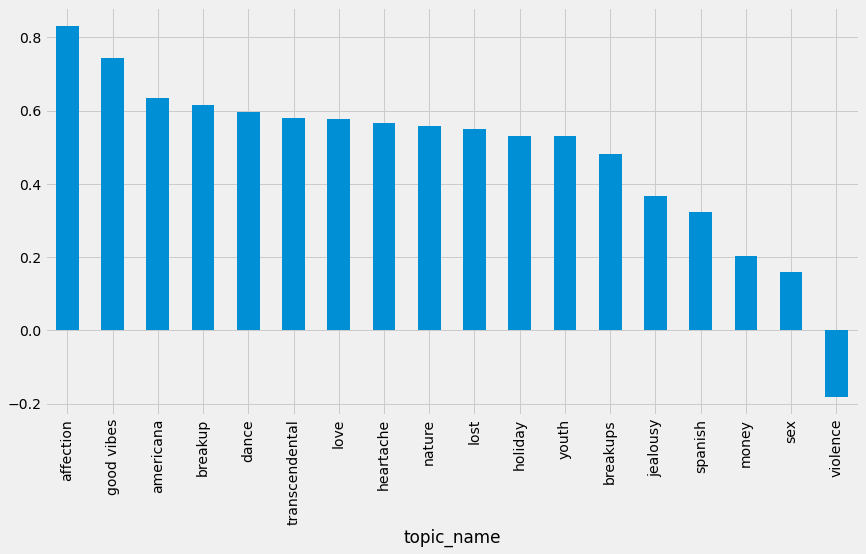

In [40]:
# What is the average sentiment for each topic?
df.groupby(['topic_name']).mean()['sentiment'].sort_values(ascending = False).plot(kind = 'bar')

In [42]:
# What are the top 5 topics for each decade?
df.groupby(['decade']).topic_name.value_counts().head(5)

decade  topic_name
1950    affection     110
        lost           90
        breakups       58
        youth          47
        americana      42
Name: topic_name, dtype: int64

<AxesSubplot:>

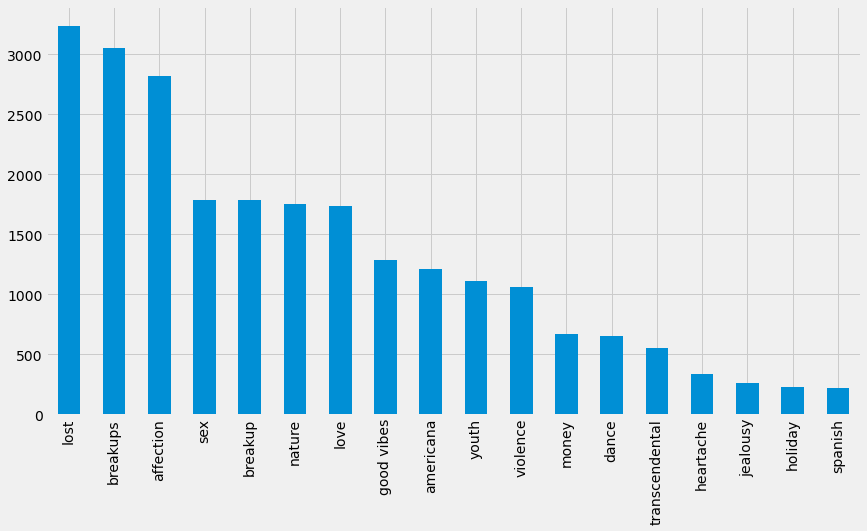

In [51]:
# Most popular topics?
df.topic_name.value_counts().plot(kind = 'bar')

In [56]:
def split_data(df):
    '''
    This function takes in a data frame and splits it appropriately in order
    to return a train with 56%, validate with 24%, and test with 20% of the
    original data frame.
    '''
    # Split with train being 80% and test being 20%. Stratify on target.
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    # Split the remaining train into 70% train and 30% validate.
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    # Spiltting results in a split with 56% train, 24% validate, and 20% test data from original
    return train, validate, test

In [57]:
train, validate, test = split_data(df)
train.shape[0], validate.shape[0], test.shape[0]

(13306, 5703, 4753)

In [58]:
# What topics are most unique to each decade?
train.groupby(['decade', 'topic_name']).size()\
                                    .unstack()\
                                    .sort_values(by = 'topic_name', 
                                                 ascending = False)

KeyError: 'topic_name'